### Import Modules

In [125]:
# Core
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime
import re
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense
from xgboost import XGBRegressor 
from sklearn.neighbors import KNeighborsRegressor

### Import Data

Additional features are clicks on course material data.

In [84]:
df_ml_click = pd.read_csv('data/post_eda_click.csv')

Time function to track run time of algorithms.

Code Source: https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost

In [85]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

Show all dataframe columns for analyis.

Code Source: 

https://stackoverflow.com/questions/47022070/display-all-dataframe-columns-in-a-jupyter-python-notebook/47022213

In [86]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [87]:
df_ml_click.shape

(37030, 71)

In [88]:
df_ml_click.head(2)

,is_banked,module_presentation_length,num_of_prev_attempts,studied_credits,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,assess_date,length_no_cred_ratio,date_registration,score,avg_click,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J,assessment_type_Exam,assessment_type_TMA,gender_M,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,imd_band_10-20,imd_band_20-30%,imd_band_30-40%,imd_band_40-50%,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_35-55,age_band_55<=,disability_Y,final_result_Fail,final_result_Pass
0,0,269,0,60,21.0,4.0,12.0,3.0,451.0,3.0,497.0,5.0,5.0,1505.0,9.0,43.0,5.0,12.0,185.0,2.5,31.0,1.0,143.0,143.0,2.6,4.483333,-52.0,61.8,133.118254,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1,0,268,0,240,14.0,4.0,12.0,3.0,193.0,3.0,138.0,5.0,5.0,553.0,9.0,43.0,5.0,12.0,185.0,2.5,13.0,1.0,32.0,5.0,1.8,1.116667,-159.0,82.0,44.529365,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1


### Machine Learning Models

Create features and target. Not able to stratify due to low number of records.

Code Source: https://stackoverflow.com/questions/29438265/stratified-train-test-split-in-scikit-learn

In [89]:
X = df_ml_click.drop('score', axis=1)
y = df_ml_click['score']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20)

### Linear Regression

Code Source: https://scikit-learn.org/stable/modules/cross_validation.html

Fit, cross validate, and train linear regression model.

In [90]:
# Fit model
lr = linear_model.LinearRegression()

# Cross Validation
lr_scores = cross_validate(lr, X_train, y_train, cv=10, scoring=('r2','neg_mean_squared_error'), 
                        return_train_score=True)

# Train model and wrap in time function
start_time = timer(None) 
lr.fit(X_train, y_train)
timer(start_time) 



 Time taken: 0 hours 0 minutes and 0.05 seconds.


Display prediction results.

Code Source: 

https://stackoverflow.com/questions/42033720/python-sklearn-multiple-linear-regression-display-r-squared 

https://scikit-learn.org/stable/modules/cross_validation.html

In [91]:
print ("RMSE Train: %0.4f" % np.sqrt(np.negative(np.mean(lr_scores['train_neg_mean_squared_error']))))
print ("Adjusted r2 Train: %0.4f" % (1 - (1-np.mean(lr_scores['train_r2']))*(len(y_train)-1)/(len(y_train-X_train.shape[1]-1))))    
print ("RMSE Test: %0.2f" % np.sqrt(np.negative(np.mean(lr_scores['test_neg_mean_squared_error']))))     
print ("Adjusted r2 Test: %0.4f" % (1 - (1-np.mean(lr_scores['test_r2']))*(len(y_train)-1)/(len(y_train-X_train.shape[1]-1))))  

RMSE Train: 12.9396
Adjusted r2 Train: 0.3838
RMSE Test: 12.97
Adjusted r2 Test: 0.3804


<font size=3>Metrics to be used for Grid Searches,</font>

In [92]:
scoring = {'r2': 'r2', 'MSE': 'neg_mean_squared_error'}

<font size=3>Try some regularization with Ridge and use Grid Search.</font><br><br>
<font size = 2>Code Source: https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/<font>

In [93]:
# Range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

lrrig = linear_model.Ridge()

lrrig_gs = GridSearchCV(estimator=lrrig, param_grid=dict(alpha=alphas),scoring=scoring,
                        refit='r2',return_train_score=True)

start_time = timer(None) 
lrrig_gs.fit(X_train, y_train)
timer(start_time)


/Users/christiandavies/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



 Time taken: 0 hours 0 minutes and 0.74 seconds.


<font size=3>Display Prediction Results.</font><br><br>
<font size = 2>Code Source for pulling results from Grid Search: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/<font>

In [94]:
print("Best Estimator: %0.2f" % lrrig_gs.best_estimator_.alpha)
print ("RMSE Train: %0.2f" % np.sqrt(np.negative(np.mean(lrrig_gs.cv_results_['mean_train_MSE'])))) 
print ("Adjusted r2 Train: %0.4f" % (1 - (1-np.mean(lrrig_gs.cv_results_['mean_train_r2']))*(len(y_train)-1)/(len(y_train-X_train.shape[1]-1))))  
print ("RMSE Test: %0.2f" % np.sqrt(np.negative(np.mean(lrrig_gs.cv_results_['mean_test_MSE'])))) 
print ("Adjusted r2 Test: %0.4f" % (1 - (1-np.mean(lrrig_gs.cv_results_['mean_test_r2']))*(len(y_train)-1)/(len(y_train-X_train.shape[1]-1)))) 

Best Estimator: 1.00
RMSE Train: 12.93
Adjusted r2 Train: 0.3842
RMSE Test: 12.98
Adjusted r2 Test: 0.3802


<font size=3>Try some regularization with Lasso and use Grid Search.</font>

In [95]:
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

lrlas = linear_model.Lasso()

lrlas_gs = GridSearchCV(estimator=lrlas, param_grid=dict(alpha=alphas),scoring=scoring,
                        refit='r2',return_train_score=True)

start_time = timer(None)
lrlas_gs.fit(X_train, y_train)
timer(start_time)

/Users/christiandavies/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/christiandavies/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/christiandavies/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/christiandavies/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: Co


 Time taken: 0 hours 0 minutes and 22.93 seconds.


/Users/christiandavies/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


<font size=3>Display Prediction Results.</font>

In [96]:
print("Best Estimator: %0.2f" % lrlas_gs.best_estimator_.alpha)
print ("RMSE Train: %0.2f" % np.sqrt(np.negative(np.mean(lrlas_gs.cv_results_['mean_train_MSE'])))) 
print ("Adjusted r2 Train: %0.4f" % (1 - (1-np.mean(lrlas_gs.cv_results_['mean_train_r2']))*(len(y_train)-1)/(len(y_train-X_train.shape[1]-1))))  
print ("RMSE Test: %0.2f" % np.sqrt(np.negative(np.mean(lrlas_gs.cv_results_['mean_test_MSE'])))) 
print ("Adjusted r2 Test: %0.4f" % (1 - (1-np.mean(lrlas_gs.cv_results_['mean_test_r2']))*(len(y_train)-1)/(len(y_train-X_train.shape[1]-1)))) 

Best Estimator: 0.00
RMSE Train: 13.27
Adjusted r2 Train: 0.3522
RMSE Test: 13.30
Adjusted r2 Test: 0.3489


<font size=3>Make predictions for train and test using straight regression model as it did the best</font><br><br>
<font size=2>Code Source: Machine-learning-for-finance-in-python - Data Camp - Nathan George</font>

In [97]:
train_predictions_lr = lr.predict(X_train)
test_predictions_lr = lr.predict(X_test)

<font size=3>Display Prediction Results.</font>

In [98]:
print ("RMSE Train: %0.4f" % np.sqrt(mean_squared_error(y_train,train_predictions_lr)))
print ("Adjusted r2 Train: %0.4f" % (1 - (1-r2_score(y_train,train_predictions_lr))*(len(y_train)-1)/(len(y_train-X_train.shape[1]-1))))    
print ("RMSE Test: %0.4f" % np.sqrt(mean_squared_error(y_test,test_predictions_lr)))  
print ("Adjusted r2 Test: %0.4f" % (1 - (1-r2_score(y_test,test_predictions_lr))*(len(y_test)-1)/(len(y_test-X_test.shape[1]-1))))  


RMSE Train: 12.9412
Adjusted r2 Train: 0.3836
RMSE Test: 12.8209
Adjusted r2 Test: 0.3798


<font size=3>Plot predictions vs. targets, with good prediction line.</font><br><br>
<font size=2>Code Source: Machine-learning-for-finance-in-python - Data Camp - Nathan George</font>

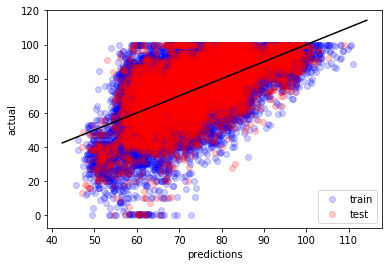

In [99]:
plt.scatter(train_predictions_lr, y_train, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions_lr, y_test, alpha=0.2, color='r', label='test')

xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()
plt.show()

<font size=3>Baseline - quick test to see what score we'd get if we guessed the mean of the dataset for every record.</font>

In [100]:
train_pred_lr_base = pd.DataFrame(y_train)
test_pred_lr_base = pd.DataFrame(y_test)

In [101]:
print(np.mean(y_train))
print(np.mean(y_test))

74.2395638832089
74.36658565127382


<font size=3>Set all predicted values to mean.</font>

In [102]:
# Set all predicted values to mean

for i in train_pred_lr_base:
    train_pred_lr_base[i] = 74.2811258246211
    
    
for i in test_pred_lr_base:
    test_pred_lr_base[i] = 74.20033788562688

<font size=3>Display Prediction Results.</font>

In [103]:
print ("RMSE Train: %0.4f" % np.sqrt(mean_squared_error(y_train,train_pred_lr_base)))
print ("Adjusted r2 Train: %0.4f" % (1 - (1-r2_score(y_train,train_pred_lr_base))*(len(y_train)-1)/(len(y_train-X_train.shape[1]-1))))    
print ("RMSE Test: %0.4f" % np.sqrt(mean_squared_error(y_test,test_pred_lr_base)))  
print ("Adjusted r2 Test: %0.4f" % (1 - (1-r2_score(y_test,test_pred_lr_base))*(len(y_test)-1)/(len(y_test-X_test.shape[1]-1))))  

RMSE Train: 16.4834
Adjusted r2 Train: 0.0000
RMSE Test: 16.2797
Adjusted r2 Test: 0.0000


### Random Forest - ensemble

<font size=3>Instantiate model and set parameters for Grid Search.</font>

In [104]:
rf = RandomForestRegressor(random_state=42)

parameters = { 'max_features':np.arange(5,10),'n_estimators':[500],'min_samples_leaf': [10,50,100,200,500]}

rf_gs = GridSearchCV(rf,parameters,scoring=scoring,refit='r2',cv=5,return_train_score=True)

start_time = timer(None) 
rf_gs.fit(X_train, y_train)
timer(start_time)


 Time taken: 0 hours 19 minutes and 28.52 seconds.


<font size=3>Print the tuned parameters and score.</font>

In [105]:
print("Tuned Random Forest Parameters: {}".format(rf_gs.best_params_))
print("Best score is {}".format(rf_gs.best_score_))

Tuned Random Forest Parameters: {'max_features': 9, 'min_samples_leaf': 10, 'n_estimators': 500}
Best score is 0.4923377668711096


<font size=3>Make predictions for train and test sets using optimized randon forest model.</font>

In [106]:
train_predictions_rf = rf_gs.predict(X_train)
test_predictions_rf = rf_gs.predict(X_test)

<font size=3>Display Prediction Results.</font>

In [107]:
print ("RMSE Train: %0.4f" % np.sqrt(mean_squared_error(y_train,train_predictions_rf)))
print ("Adjusted r2 Train: %0.4f" % (1 - (1-r2_score(y_train,train_predictions_rf))*(len(y_train)-1)/(len(y_train-X_train.shape[1]-1))))    
print ("RMSE Test: %0.4f" % np.sqrt(mean_squared_error(y_test,test_predictions_rf)))  
print ("Adjusted r2 Test: %0.4f" % (1 - (1-r2_score(y_test,test_predictions_rf))*(len(y_test)-1)/(len(y_test-X_test.shape[1]-1))))  

RMSE Train: 10.1937
Adjusted r2 Train: 0.6176
RMSE Test: 11.4554
Adjusted r2 Test: 0.5049


<font size=3>Plot predictions vs. targets, with good prediction line.</font>

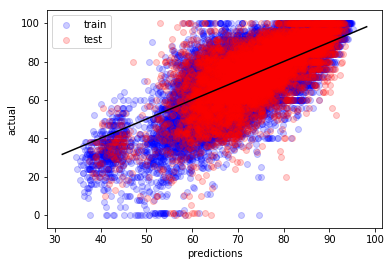

In [108]:
plt.scatter(train_predictions_rf, y_train, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions_rf, y_test, alpha=0.2, color='r', label='test')

xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()
plt.show()

<font size=3>Create a series for feature names.</font>

In [109]:
X_train.head(2)

,is_banked,module_presentation_length,num_of_prev_attempts,studied_credits,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,assess_date,length_no_cred_ratio,date_registration,avg_click,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J,assessment_type_Exam,assessment_type_TMA,gender_M,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,imd_band_10-20,imd_band_20-30%,imd_band_30-40%,imd_band_40-50%,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_35-55,age_band_55<=,disability_Y,final_result_Fail,final_result_Pass
5240,0,241,0,150,14.0,4.0,26.0,3.0,545.0,3.0,741.0,5.0,5.0,406.0,9.0,81.0,5.0,12.0,185.0,2.5,82.0,1.0,353.0,27.0,5.50,1.606667,-108.0,107.743175,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7176,0,269,0,60,14.0,4.0,12.0,3.0,113.0,3.0,270.0,5.0,5.0,34.0,9.0,43.0,2.0,12.0,1110.0,2.5,66.0,1.0,103.0,5.0,-3.25,4.483333,-81.0,81.308730,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [115]:
feature_names = ["is_banked","module_presentation_length","num_of_prev_attempts","studied_credits","dataplus","dualpane","externalquiz","folder","forumng","glossary","homepage",
         "htmlactivity","oucollaborate","oucontent","ouelluminate","ouwiki","page","questionnaire","quiz","repeatactivity","resource","sharedsubpage","subpage","url","assess_date","length_no_cred_ratio",
          "date_registration","avg_click","code_module_BBB","code_module_CCC","code_module_DDD","code_module_EEE","code_module_FFF","code_module_GGG","code_presentation_2013J","code_presentation_2014B",
           "code_presentation_2014J","assessment_type_Exam","assessment_type_TMA","gender_M","region_East Midlands Region","region_Ireland","region_London Region","region_North Region",
            "region_North Western Region","region_Scotland","region_South East Region", "region_South Region", "region_South West Region", "region_Wales","region_West Midlands Region",
           "region_Yorkshire Region","highest_education_HE Qualification","highest_education_Lower Than A Level","highest_education_No Formal quals",
           "highest_education_Post Graduate Qualification","imd_band_10-20","imd_band_20-30%","imd_band_30-40%","imd_band_40-50%","imd_band_50-60%",
            "imd_band_60-70%","imd_band_70-80%","imd_band_80-90%","imd_band_90-100%","age_band_35-55","age_band_55<=","disability_Y","final_result_Fail","final_result_Pass"]


<font size=3>Fitting the rf estimator to get feature importances.</font>

In [116]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

<font size=3>Get feature importances from our random forest model, sort greatest importance from greatest to least, and rotate tick labels to verticle.</font><br><br>
<font size=2>Code Source: Machine-learning-for-finance-in-python - Data Camp - Nathan George</font>

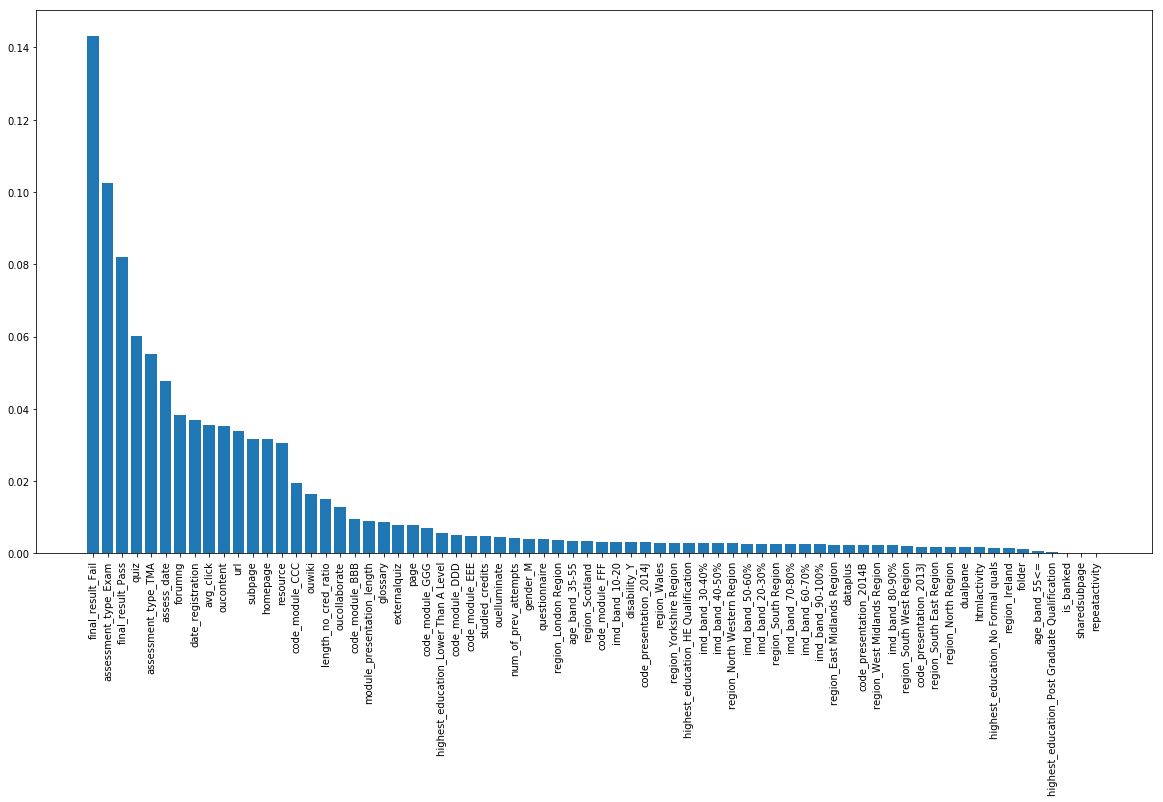

In [117]:
importances = rf.feature_importances_

sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

labels = np.array(feature_names)[sorted_index]
plt.figure(figsize=(20,10))
plt.bar(x, importances[sorted_index], tick_label=labels)

plt.xticks(rotation=90)
plt.show()

<font size=3>Use only important features.</font>

In [118]:
X_train_imp = X_train[['final_result_Fail','assessment_type_Exam','final_result_Pass','quiz','assessment_type_TMA',
                       'assess_date','forumng','date_registration','avg_click','oucontent','url','subpage','homepage',
                       'resource','code_module_CCC','ouwiki','length_no_cred_ratio','oucollaborate','code_module_BBB',
                       'module_presentation_length','glossary','externalquiz','page','code_module_GGG','highest_education_Lower Than A Level',
                       'code_module_DDD','code_module_EEE','studied_credits','ouelluminate','num_of_prev_attempts',
                       'gender_M','questionnaire','region_London Region','age_band_35-55','region_Scotland','code_module_FFF',
                       'imd_band_10-20','disability_Y', 'code_presentation_2014J']]

X_test_imp = X_test[['final_result_Fail','assessment_type_Exam','final_result_Pass','quiz','assessment_type_TMA',
                       'assess_date','forumng','date_registration','avg_click','oucontent','url','subpage','homepage',
                       'resource','code_module_CCC','ouwiki','length_no_cred_ratio','oucollaborate','code_module_BBB',
                       'module_presentation_length','glossary','externalquiz','page','code_module_GGG','highest_education_Lower Than A Level',
                       'code_module_DDD','code_module_EEE','studied_credits','ouelluminate','num_of_prev_attempts',
                       'gender_M','questionnaire','region_London Region','age_band_35-55','region_Scotland','code_module_FFF',
                       'imd_band_10-20','disability_Y', 'code_presentation_2014J']]



<font size=3>Grid Search for model with only important features.</font>

In [119]:
rf_gs_imp = GridSearchCV(rf,parameters,scoring=scoring,refit='r2',cv=5,return_train_score=True)

start_time = timer(None) 
rf_gs_imp.fit(X_train_imp, y_train)
timer(start_time) 


 Time taken: 0 hours 23 minutes and 2.14 seconds.


<font size=3>Print the tuned parameters and score.</font>

In [120]:
print("Tuned Random Forest Parameters: {}".format(rf_gs_imp.best_params_))
print("Best score is {}".format(rf_gs_imp.best_score_))

Tuned Random Forest Parameters: {'max_features': 9, 'min_samples_leaf': 10, 'n_estimators': 500}
Best score is 0.5150389007875738


<font size=3>Make Predictions.</font>

In [121]:
train_predictions_rf_gs_imp = rf_gs_imp.predict(X_train_imp)
test_predictions_rf_gs_imp = rf_gs_imp.predict(X_test_imp)

<font size=3>Display Prediction Results.</font>

In [122]:
print ("RMSE Train: %0.4f" % np.sqrt(mean_squared_error(y_train,train_predictions_rf_gs_imp)))
print ("Adjusted r2 Train: %0.4f" % (1 - (1-r2_score(y_train,train_predictions_rf_gs_imp))*(len(y_train)-1)/(len(y_train-X_train.shape[1]-1))))    
print ("RMSE Test: %0.4f" % np.sqrt(mean_squared_error(y_test,test_predictions_rf_gs_imp)))  
print ("Adjusted r2 Test: %0.4f" % (1 - (1-r2_score(y_test,test_predictions_rf_gs_imp))*(len(y_test)-1)/(len(y_test-X_test.shape[1]-1))))  


RMSE Train: 9.6491
Adjusted r2 Train: 0.6573
RMSE Test: 11.2207
Adjusted r2 Test: 0.5250


<font size=3>Plot predictions vs targets, with good prediction line.</font>

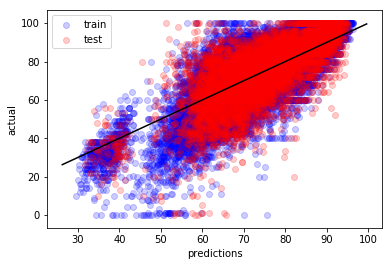

In [123]:
plt.scatter(train_predictions_rf_gs_imp, y_train, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions_rf_gs_imp, y_test, alpha=0.2, color='r', label='test')

xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()
plt.show()

### KNN

<font size=2>Code Source: https://discuss.analyticsvidhya.com/t/grid-search-related-to-machine-learning-knn-algorithm/69126</font>

In [129]:
parameters = {'n_neighbors':[4,5,6,7],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}

<font size=3>Instantiate model and set parameters for Grid Search.</font>

In [130]:
knn = KNeighborsRegressor()

knn_gs = GridSearchCV(knn,parameters,scoring=scoring,refit='r2',cv=5,return_train_score=True)

start_time = timer(None)
knn_gs.fit(X_train, y_train)
timer(start_time)


 Time taken: 0 hours 15 minutes and 36.49 seconds.


<font size=3>Print the tuned parameters and score.</font>

In [131]:
print("Tuned KNN Parameters: {}".format(knn_gs.best_params_))
print("Best score is {}".format(knn_gs.best_score_))

Tuned KNN Parameters: {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 7}
Best score is 0.15313969177483955


<font size=3>Make Predictions.</font>

In [132]:
train_predictions_knn = knn_gs.predict(X_train)
test_predictions_knn = knn_gs.predict(X_test)

<font size=3>Display Prediction Results.</font>

In [133]:
print ("RMSE Train: %0.4f" % np.sqrt(mean_squared_error(y_train,train_predictions_knn)))
print ("Adjusted r2 Train: %0.4f" % (1 - (1-r2_score(y_train,train_predictions_knn))*(len(y_train)-1)/(len(y_train-X_train.shape[1]-1))))    
print ("RMSE Test: %0.4f" % np.sqrt(mean_squared_error(y_test,test_predictions_knn)))  
print ("Adjusted r2 Test: %0.4f" % (1 - (1-r2_score(y_test,test_predictions_knn))*(len(y_test)-1)/(len(y_test-X_test.shape[1]-1))))  


RMSE Train: 12.9838
Adjusted r2 Train: 0.3796
RMSE Test: 14.8854
Adjusted r2 Test: 0.1640


<font size=3>Plot predictions vs targets, with good prediction line.</font>

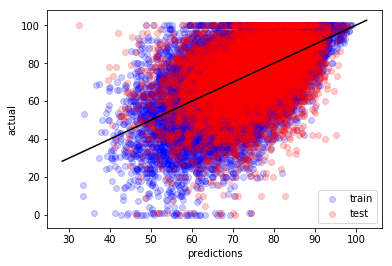

In [134]:
plt.scatter(train_predictions_knn, y_train, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions_knn, y_test, alpha=0.2, color='r', label='test')

xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()
plt.show()

### Neural Net

<font size=2>Code Source: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/</font>

<font size=3>Function to create model.</font>

In [135]:
def create_model():
    
    model = Sequential()
    model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(optimizer='adam', loss='mse')
    
    return model

In [136]:
model = KerasRegressor(build_fn=create_model, verbose=0)

<font size=3>Instantiate model and set parameters for Grid Search.</font>

In [137]:
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

nn_gs = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)

start_time = timer(None) 
nn_gs.fit(X_train, y_train)
timer(start_time) 


/Users/christiandavies/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/christiandavies/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



 Time taken: 0 hours 18 minutes and 20.32 seconds.


<font size=3>Print the tuned parameters and score.</font>

In [138]:
print("Tuned Neural Net Parameters: {}".format(nn_gs.best_params_))
print("Best score is {}".format(nn_gs.best_score_))

Tuned Neural Net Parameters: {'batch_size': 10, 'epochs': 100}
Best score is -148.30124917720545


<font size=3>Make Predictions.</font>

In [139]:
train_predictions_nn = nn_gs.predict(X_train)
test_predictions_nn = nn_gs.predict(X_test)

<font size=3>Display prediction results.</font>

In [140]:
print ("RMSE Train: %0.4f" % np.sqrt(mean_squared_error(y_train,train_predictions_nn)))
print ("Adjusted r2 Train: %0.4f" % (1 - (1-r2_score(y_train,train_predictions_nn))*(len(y_train)-1)/(len(y_train-X_train.shape[1]-1))))    
print ("RMSE Test: %0.4f" % np.sqrt(mean_squared_error(y_test,test_predictions_nn)))  
print ("Adjusted r2 Test: %0.4f" % (1 - (1-r2_score(y_test,test_predictions_nn))*(len(y_test)-1)/(len(y_test-X_test.shape[1]-1))))  


RMSE Train: 11.4878
Adjusted r2 Train: 0.5143
RMSE Test: 11.9323
Adjusted r2 Test: 0.4628


<font size=3>Plot predictions vs targets, with good prediction line.</font>

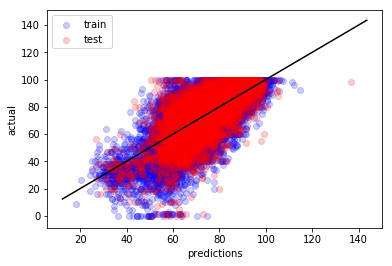

In [141]:
plt.scatter(train_predictions_nn, y_train, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions_nn, y_test, alpha=0.2, color='r', label='test')

xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()
plt.show()

### XGBoost

<font size=3>Fix issue with name formats.</font><br><br>
<font size=2>Code Source: https://stackoverflow.com/questions/48645846/pythons-xgoost-valueerrorfeature-names-may-not-contain-or</font>

In [142]:
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]


<font size=3>Parameter grid for XGBoost.</font><br><br>
<font size=2>Code Source: https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost</font>

In [143]:
parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

<font size=3>Instantiate model and set parameters for Grid Search.</font><br><br>
<font size=2>Code Source: https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn & https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html</font>

In [144]:
xgb = XGBRegressor(random_state=42)

xb_gs = GridSearchCV(xgb,param_grid=parameters,
                  scoring=scoring, cv=5, refit='r2', return_train_score=True,n_jobs=3)

start_time = timer(None) 
xb_gs.fit(X_train, y_train)
timer(start_time)




 Time taken: 1 hours 53 minutes and 27.5 seconds.


<font size=3>Print the tuned parameters and score.</font>

In [145]:
print("Tuned XGBoost Parameters: {}".format(xb_gs.best_params_))
print("Best score is {}".format(xb_gs.best_score_))

Tuned XGBoost Parameters: {'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.8}
Best score is 0.5207553727102363


<font size=3>Make predictions.</font>

In [146]:
train_predictions_xb = xb_gs.predict(X_train)
test_predictions_xb = xb_gs.predict(X_test)

<font size=3>Display Prediction Results.</font>

In [147]:
print ("RMSE Train: %0.4f" % np.sqrt(mean_squared_error(y_train,train_predictions_xb)))
print ("Adjusted r2 Train: %0.4f" % (1 - (1-r2_score(y_train,train_predictions_xb))*(len(y_train)-1)/(len(y_train-X_train.shape[1]-1))))    
print ("RMSE Test: %0.4f" % np.sqrt(mean_squared_error(y_test,test_predictions_xb)))  
print ("Adjusted r2 Test: %0.4f" % (1 - (1-r2_score(y_test,test_predictions_xb))*(len(y_test)-1)/(len(y_test-X_test.shape[1]-1))))  


RMSE Train: 10.7053
Adjusted r2 Train: 0.5782
RMSE Test: 11.1868
Adjusted r2 Test: 0.5278


<font size=3>Plot predictions vs the targets, with good prediction line.</font>

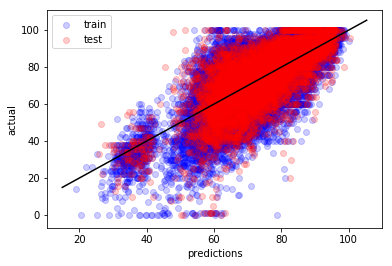

In [148]:
plt.scatter(train_predictions_xb, y_train, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions_xb, y_test, alpha=0.2, color='r', label='test')

xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()
plt.show()